In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Installing torch_nightly and fastai 
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html  gwpy &> /dev/null
!pip install fastai  gwpy &> /dev/null

In [ ]:
!pip install tensorflow==1.15
!pip install "tensorflow_hub>=0.6.0"

In [ ]:
import torch
print("Cuda available" if torch.cuda.is_available() is True else "CPU")
print("PyTorch version: ", torch.__version__)

Cuda available
PyTorch version:  1.2.0.dev20190805+cu92


In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.1MB/s 


In [ ]:
from fastai import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os
from fastai.text import *

In [ ]:
#importing the libraries
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
import os
import re
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go
import itertools
from scipy import stats
from ast import literal_eval
import spacy

Using TensorFlow backend.


In [ ]:
!pip install nltk
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import gensim
import json
import pickle

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
import keras.utils
from keras import utils as np_utils

#Keras Tokenizer just replaces certain punctuation characters and splits on the remaining space character.
#NLTK Tokenizer uses the Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank. 

In [ ]:
def transcripts_to_dataframe(directory):
    rows_list = []
        
    filenames = os.listdir(directory)
    
    if ".DS_Store" in filenames:
        filenames.remove(".DS_Store")
        
    for filename in filenames:
        transcript_path = os.path.join(directory, filename)
        transcript = pd.read_csv(transcript_path, sep='\t')
        m = re.search("(\d{3})_TRANSCRIPT.csv", filename)
        if m:
            person_id = m.group(1)
            p = {}
            question = ""
            answer = ""
            lines = len(transcript)
            for i in range(0, lines):
                row = transcript.iloc[i]
                if (row["speaker"] == "Ellie") or (i == lines - 1):
                    p["personId"] = person_id
                    if "(" in str(question):
                        question = question[question.index("(") + 1:question.index(")")]
                    p["question"] = question
                    p["answer"] = answer
                    if question != "":
                        rows_list.append(p)
                    p = {}
                    answer = ""
                    question = row["value"]
                else:
                    answer = str(answer) + " " + str(row["value"])

    all_participants = pd.DataFrame(rows_list, columns=['personId', 'question', 'answer'])
    all_participants.to_csv(directory + 'all.csv', sep=',')
    print("File was created")
    return all_participants

In [ ]:
#loading the data
data_path = "/content/drive/My Drive/transcripts/"
all_participants = transcripts_to_dataframe(data_path)

File was created


In [ ]:
all_participants.head(20)

,personId,question,answer
0,300,hi i'm ellie thanks for coming in today,
1,300,i was created to talk to people in a safe and ...,
2,300,think of me as a friend i don't judge i can't ...,
3,300,i'm here to learn about people and would love ...,
4,300,i'll ask a few questions to get us started and...,
5,300,how are you doing today,good
6,300,that's good,
7,300,where are you from originally,atlanta georgia
8,300,really,
9,300,why'd you move to l_a,um my parents are from here um


In [ ]:
#Selecting the data from the data from based on the questions asked  ['where', 'when', 'how', 'why', 'are', 'what', 'do', 'have', 'can', 'did', 'is', 'could', 'so', 'tell', 'who', 'has']
interrogative = ["where", "when", "how","why","are","what","do","have","can","did","is", "could", "so", "tell", "who", "has"]
rslt_df = all_participants[all_participants.question.str.contains('|'.join(interrogative),na=False)]
rslt_df['answer'].replace('', np.nan, inplace=True)
rslt_df.dropna(subset = ["answer"], inplace=True)
rslt_df.reset_index(drop=True, inplace=True)
rslt_df
#rslt_df = rslt_df.to_csv("/content/drive/My Drive/rslt_df.csv")

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,personId,question,answer
0,300,how are you doing today,good
1,300,where are you from originally,atlanta georgia
2,300,why'd you move to l_a,um my parents are from here um
3,300,how do you like l_a,i love it
4,300,what are some things you really like about l_a,i like the weather i like the opportunities u...
...,...,...,...
8698,390,that's so good to hear,mm
8699,390,is there anything you regret,um hm no um except meeting that one woman uh
8700,390,what advice would you give to yourself ten or ...,uh i don't know probably try a little harder ...
8701,390,tell me how you spend your ideal weekend,oh um getting out of town um going going away...


In [ ]:
rslt_df.sample(10)

,personId,question,answer
6696,452,where are you from originally,i'm from california
7444,463,what are some things you don't really like abo...,um the traffic <laughter>
7751,474,how did you decide to do that,well i always wanted to tell stories so it ju...
5455,420,what are you most proud of in your life,my daughter
1029,321,how easy is it for you to get a good night's s...,i haven't had a good night's sleep in a year ...
2907,353,do you consider yourself an introvert,um sometimes
2737,359,how have you been feeling lately,<laughter> i don't wanna uh lately probably i...
476,311,how easy was it for you to get used to living ...,it it wasn't hard to get used i i didn't like...
6901,454,have you ever been diagnosed with p_t_s_d,no
8255,364,what did you do after the military,uh i went to graduate i was still in the rese...


In [ ]:
rslt_df['question']= rslt_df.apply(lambda row: "{0}?".format(row.question), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
rslt_df

,personId,question,answer
0,300,how are you doing today?,good
1,300,where are you from originally?,atlanta georgia
2,300,why'd you move to l_a?,um my parents are from here um
3,300,how do you like l_a?,i love it
4,300,what are some things you really like about l_a?,i like the weather i like the opportunities u...
...,...,...,...
8698,390,that's so good to hear?,mm
8699,390,is there anything you regret?,um hm no um except meeting that one woman uh
8700,390,what advice would you give to yourself ten or ...,uh i don't know probably try a little harder ...
8701,390,tell me how you spend your ideal weekend?,oh um getting out of town um going going away...


In [ ]:
rslt_df['statements'] = rslt_df[['question', 'answer']].agg(':'.join, axis=1)
rslt_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,personId,question,answer,statements
0,300,how are you doing today?,good,how are you doing today?: good
1,300,where are you from originally?,atlanta georgia,where are you from originally?: atlanta georgia
2,300,why'd you move to l_a?,um my parents are from here um,why'd you move to l_a?: um my parents are from...
3,300,how do you like l_a?,i love it,how do you like l_a?: i love it
4,300,what are some things you really like about l_a?,i like the weather i like the opportunities u...,what are some things you really like about l_a...
...,...,...,...,...
8698,390,that's so good to hear?,mm,that's so good to hear?: mm
8699,390,is there anything you regret?,um hm no um except meeting that one woman uh,is there anything you regret?: um hm no um exc...
8700,390,what advice would you give to yourself ten or ...,uh i don't know probably try a little harder ...,what advice would you give to yourself ten or ...
8701,390,tell me how you spend your ideal weekend?,oh um getting out of town um going going away...,tell me how you spend your ideal weekend?: oh ...


In [ ]:
#WINDOWS_SIZE = 10
labels=['none','mild','moderate','moderately severe', 'severe']
num_classes = len(labels)

In [ ]:
def load_avec_dataset_file(path,score_column):
    ds = pd.read_csv(path, sep=',')
    ds['level'] = pd.cut(ds[score_column], bins=[-1,0,5,10,15,25], labels=[0,1,2,3,4])  #cut function used to segregate array into bins 5 levels - 'none','mild','moderate','moderately severe', 'severe'
    ds['PHQ8_Score'] = ds[score_column]
    ds['cat_level'] = keras.utils.to_categorical(ds['level'], num_classes).tolist() #categorical levels 
    ds = ds[['Participant_ID', 'level', 'cat_level', 'PHQ8_Score']]
    ds = ds.astype({"Participant_ID": int, "level": int, 'PHQ8_Score': int})
    return ds

In [ ]:
train = load_avec_dataset_file('/content/drive/My Drive/Depression_detect/train_split_Depression_AVEC2017 (1).csv','PHQ8_Score')
dev = load_avec_dataset_file('/content/drive/My Drive/Depression_detect/dev_split_Depression_AVEC2017.csv','PHQ8_Score')
test = load_avec_dataset_file('/content/drive/My Drive/Depression_detect/full_test_split.csv','PHQ8_Score')
print("Size: train= {}, dev= {}, test= {}".format(len(train), len(dev), len(test)))
train.head()

Size: train= 107, dev= 35, test= 47


,Participant_ID,level,cat_level,PHQ8_Score
0,303,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0
1,304,2,"[0.0, 0.0, 1.0, 0.0, 0.0]",6
2,305,2,"[0.0, 0.0, 1.0, 0.0, 0.0]",7
3,310,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",4
4,312,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",2


In [ ]:
ds_total = pd.concat([train,dev,test],sort=True)
total_phq8 = len(ds_total)
print("Total size = {}".format(total_phq8))

Total size = 189


In [ ]:
ds_total

,PHQ8_Score,Participant_ID,cat_level,level
0,0,303,"[1.0, 0.0, 0.0, 0.0, 0.0]",0
1,6,304,"[0.0, 0.0, 1.0, 0.0, 0.0]",2
2,7,305,"[0.0, 0.0, 1.0, 0.0, 0.0]",2
3,4,310,"[0.0, 1.0, 0.0, 0.0, 0.0]",1
4,2,312,"[0.0, 1.0, 0.0, 0.0, 0.0]",1
...,...,...,...,...
42,0,467,"[1.0, 0.0, 0.0, 0.0, 0.0]",0
43,3,469,"[0.0, 1.0, 0.0, 0.0, 0.0]",1
44,3,470,"[0.0, 1.0, 0.0, 0.0, 0.0]",1
45,1,480,"[0.0, 1.0, 0.0, 0.0, 0.0]",1


In [ ]:
def split_by_phq_level(ds):
    none_ds = ds[ds['level']==0]
    mild_ds = ds[ds['level']==1]
    moderate_ds = ds[ds['level']==2]
    moderate_severe_ds = ds[ds['level']==3]
    severe_ds = ds[ds['level']==4]
    return (none_ds, mild_ds, moderate_ds, moderate_severe_ds, severe_ds)

In [ ]:
none_ds, mild_ds, moderate_ds, moderate_severe_ds, severe_ds = split_by_phq_level(ds_total)
print("Quantity per none_ds: {}, mild_ds: {}, moderate_ds {}, moderate_severe_ds: {}, severe_ds {}".format(len(none_ds), len(mild_ds), len(moderate_ds), len(moderate_severe_ds), len(severe_ds)))

Quantity per none_ds: 26, mild_ds: 70, moderate_ds 47, moderate_severe_ds: 24, severe_ds 22


In [ ]:
b_none_ds = ds_total[ds_total['level']==0]
b_mild_ds = ds_total[ds_total['level']==1].sample(26)
b_moderate_ds = ds_total[ds_total['level']==2].sample(26)
b_moderate_severe_ds = ds_total[ds_total['level']==3]
b_severe_ds = ds_total[ds_total['level']==4]

ds_total_b = pd.concat([b_none_ds, b_mild_ds, b_moderate_ds, b_moderate_severe_ds, b_severe_ds])

In [ ]:
ds_lp = ds_total.merge(rslt_df,left_on=ds_total.Participant_ID.astype(int), right_on=rslt_df.personId.astype(int))
len(ds_lp)


8703

In [ ]:
def distribute_instances(ds, split_in = [70,14,16]):
    ds_shuffled = ds.sample(frac=1)
    none_ds, mild_ds, moderate_ds, moderate_severe_ds, severe_ds = split_by_phq_level(ds_shuffled)
    eq_ds = dict()
    prev_none = prev_mild = prev_moderate = prev_moderate_severe = prev_severe = 0
    split = split_in
    for p in split:
        last_none = min(len(none_ds), prev_none + round(len(none_ds) * p/100))
        last_mild = min(len(mild_ds), prev_mild + round(len(mild_ds) * p/100))
        last_moderate = min(len(moderate_ds), prev_moderate + round(len(moderate_ds) * p/100))
        last_moderate_severe = min(len(moderate_severe_ds), prev_moderate_severe + round(len(moderate_severe_ds) * p/100))
        last_severe = min(len(severe_ds), prev_severe + round(len(severe_ds) * p/100))  
        eq_ds['d'+str(p)] = pd.concat([none_ds[prev_none: last_none], mild_ds[prev_mild: last_mild], moderate_ds[prev_moderate: last_moderate], moderate_severe_ds[prev_moderate_severe: last_moderate_severe], severe_ds[prev_severe: last_severe]])
        prev_none = last_none
        prev_mild = last_mild
        prev_moderate = last_moderate
        prev_moderate_severe = last_moderate_severe
        prev_severe = last_severe  
    return (eq_ds['d70'], eq_ds['d14'], eq_ds['d16'])

In [ ]:
train_lp, dev_lp, test_lp = distribute_instances(ds_lp)


In [ ]:
len(train_lp)

6093

In [ ]:
df = pd.concat([ds_lp['level'], ds_lp['statements']], axis=1)


In [ ]:
train = pd.concat([train_lp['level'], train_lp['statements']], axis=1)


In [ ]:
train

,level,statements
6021,0,what do you enjoy about traveling?: uh just uh...
4943,0,can you tell me about that?: well my mother ha...
3494,0,what are some things you don't really like abo...
5425,0,what's something you feel guilty about?: not d...
3344,0,what are some things you wish you could change...
...,...,...
4368,4,why?: um i either have to have no sleep the ni...
6795,4,what's it like for you living with them?: um w...
5287,4,when was the last time you argued with someone...
5487,4,tell me more about that?: i don't know i just ...


In [ ]:
dev = pd.concat([dev_lp['level'], dev_lp['statements']], axis=1)


In [ ]:
test= pd.concat([test_lp['level'], test_lp['statements']], axis=1)


In [ ]:
mapping = {
  0: 'none',
  1: 'mild',
  2: 'moderate',
  3: 'moderately severe',
  4: 'severe',
}
df['level'] = df['level'].map(mapping)
train['level'] = train['level'].map(mapping)
dev['level'] = dev['level'].map(mapping)
test['level'] = test['level'].map(mapping)
df


,level,statements
0,none,how are you doing today?: okay how 'bout yourself
1,none,where are you from originally?: here in califo...
2,none,what are some things you really like about l_a...
3,none,what are some things you don't really like abo...
4,none,what'd you study at school?: sociology i have ...
...,...,...
8698,moderate,tell me about the last time you felt really ha...
8699,moderate,how would your best friend describe you?: um v...
8700,moderate,what are some things you wish you could change...
8701,moderate,what advice would you give to yourself ten or ...


In [ ]:
df.to_csv('/content/drive/My Drive/data_df.csv')
PATH = '/content/drive/My Drive'

### The TextLMDataBunch [source] class returns a "Databunch" type of object that is a custom object defined in fastai.text's API. (We first create a general language model with the unlabelled data, which we will later fit into the WikiText 103 language model)

In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(path="",train_df=train,valid_df=dev,min_freq=1)
#In a first step we create data loaders for the training and validation data sets. These data loaders can be described as iterators that loop through mini-batches.
#data_lm is a PYtorch learner object
# The Learner object is the entry point of most of the Callback objects that will customize this training loop in different ways
#Note that in this case, we specify a minimum word frequency of 1 (i.e. words that appear just once in the data are given the tag <unk> during tokenization.

In [ ]:
data_lm.show_batch()

idx,text
0,> positive and proactive and have you know taught independent thinking and techniques to rise above some of the things that were occurring and just various friends that you know i would see handling situations sometimes more much more more difficult you know dealing with things so xxbos what are some things you do n't really like about l_a ? : nothing that 's where i live i i love
1,life and i feel like she you know she 's been through a lot so she understands a lot so eh you know she 's a very positive influence xxbos can you tell me about that ? : yes it was a relationship of seven years but um that person has already moved on so uh they want me to be in their life in hopes that if something goes
2,you know for short distances um and then you know it gets really hot in the summer at times so you know that eh i could stand it being a little < lit > slightly cooler when it gets to its peak peak heat but that 's fine xxbos so how are you doing today ? : doing good xxbos is there anything you regret ? : uh just my
3,some things you wish you could change about yourself ? : um i do n't think nothing everything 's fine you know thank god everything 's good right now i do n't think there 's nothing to change like that xxbos how have you been feeling lately ? : uh maybe unsure i would say xxbos sometimes when i 'm feeling tense i turn on the fish tank screensaver hey
4,i self sleep in any situation if i have a one hour flight to san francisco i could just kind of lean against the window with the pillow have the blanket over and even on an hour flight pass out before the plane has even taken off from the ground so i can just < j > i have literally when i 've had little sleep and i very uh


In [ ]:
data_lm.train_ds.vocab.itos[:30]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'i',
 'you',
 'to',
 'and',
 '?',
 ':',
 'a',
 'that',
 'um',
 'it',
 'the',
 "'s",
 'do',
 'uh',
 'of',
 'was',
 'my',
 'in',
 "'m",
 'like',
 'what']

# Step 1: Fine Tuning the Language Model

## **Define learner object for language model finetuning**
### We define a learner object that uses the tokenized language model data, that is organized into batches for the GPU, and feed it a pre-trained language model.

language_model_learner is used to load the pretrained model AWD_LSTM and initialize the model based on language model data data_lm.

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)
#the language model learner learns from the unlabelled data which has a dropout mulitplier of 30%

### Testing the language model

In [ ]:
for i in range(5):
  print(learn.predict("What are", n_words=10))

What are then borrowed from American sources is a list of
What are seen during this period of American history today is
What are finely used by modern pay - today is a :
What are Girls on Paper won ? has been described
What are still alive has been used as a direct setting in


## **Print the structure of the language model RNN**

We can examine the architecture of the 3-layer LSTM used in ULMFit as shown below. For the language model fine-tuning, we define the embeddings based on the the target task vocabulary size. A single linear output layer is defined that updates the weights once we pass the input through the network.

In [ ]:
list(learn.model.children())

[AWD_LSTM(
   (encoder): Embedding(6640, 400, padding_idx=1)
   (encoder_dp): EmbeddingDropout(
     (emb): Embedding(6640, 400, padding_idx=1)
   )
   (rnns): ModuleList(
     (0): WeightDropout(
       (module): LSTM(400, 1152, batch_first=True)
     )
     (1): WeightDropout(
       (module): LSTM(1152, 1152, batch_first=True)
     )
     (2): WeightDropout(
       (module): LSTM(1152, 400, batch_first=True)
     )
   )
   (input_dp): RNNDropout()
   (hidden_dps): ModuleList(
     (0): RNNDropout()
     (1): RNNDropout()
     (2): RNNDropout()
   )
 ), LinearDecoder(
   (decoder): Linear(in_features=400, out_features=6640, bias=True)
   (output_dp): RNNDropout()
 )]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 5.25E-02


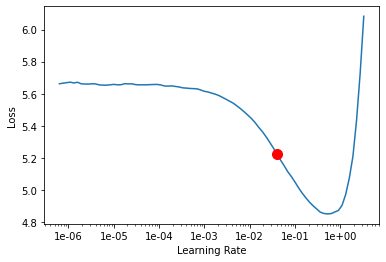

In [ ]:
learn.lr_find() #Learner.lr_find will launch an LR range test that will help you select a good learning rate.
learn.recorder.plot(suggestion=True) #learn recorder plot is a learning rate test
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
# Train freezed model
#Learner.fit_one_cycle will launch a training using the 1cycle policy to help you train your model faster.
#Uses discriminative layer training if multiple learning rates or weight decay values are passed. To control training behaviour, use the callback system or one or more of the pre-defined callbacks.
learn.fit_one_cycle(cyc_len=1, max_lr=1e-2, moms=(0.8, 0.7)) #Fit the model on this learner with lr learning rate, wd weight decay for epochs with callbacks.

epoch,train_loss,valid_loss,accuracy,time
0,3.900359,3.355841,0.357143,00:19


In [ ]:
learn.save('fit_head')
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (6093 items)
x: LMTextList
xxbos what do you enjoy about traveling ? : uh just uh seeing new places and finding new locations you know something new,xxbos can you tell me about that ? : well my mother has always been a very calm um person for the most part easygoing even though she 's experienced a lot of negativity i 've had teachers that have um been very um positive < po > positive and proactive and have you know taught independent thinking and techniques to rise above some of the things that were occurring and just various friends that you know i would see handling situations sometimes more much more more difficult you know dealing with things so,xxbos what are some things you do n't really like about l_a ? : nothing that 's where i live i i love l_a < laughter > maybe that it 's ghetto but that 's about it < laughter >,xxbos what 's something you feel guilty about ? : not doing better in school uh when i was in high school,xx

In [ ]:
# Train the unfreezed model
learn.unfreeze()
learn.fit_one_cycle(3, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,3.204413,3.263051,0.414286,00:25
1,2.994549,3.177034,0.442857,00:25
2,2.848516,3.192283,0.428571,00:25


In [ ]:
# Save the fine-tuned encoder
learn.save_encoder('ft_enc_balanced')

### fastai.train source provides a convenient utility to search through a range of learning rates to find the optimum one for our dataset.

The idea is that our optimization function needs to use a learning rate that is an order of magnitude below the point at which the loss starts to diverge


# Step 2 - Training the classifier
Now we have trained the language model following the steps explained in ULMFit paper and saved the encoder weights. We can train a classifier while re-using the encoder weights.[link text](https://)

### We only need to run the above tokenization step once, and save the data. All the data goes to a local folder named tmp/. For a large added vocabulary, the above tokenization step can take a while, hence we save them and restart the notebook from the next cell (if we close our session).

In [ ]:
data_clas = TextClasDataBunch.from_df(path = "", train_df = train, valid_df = dev, vocab=data_lm.train_ds.vocab, bs=32,min_freq=1)

In [ ]:
data_clas.save('train_ulmfit_balanced_TextClas')


xxunk: Token used instead of unknown words (words not found in the vocabulary).

xxbos: Beginning of a text.

xxfld: Represents separate parts of your document (several columns in a dataframe) like headline, body, summary, etc.

xxmaj: Indicates that the next word starts with a capital, e.g. “House” will be tokenized as “xxmaj house”.

xxup: Indicates that next word is written in all caps, e.g. “WHY” will be tokenized as “xxup why ”.

xxrep: Token indicates that a character is repeated n times, e.g. if you have  10 inarowitwillbetokenizedas“xxrep10” (in general “xxrep n  {char}”)

xxwrep: Indicates that a word is repeated n times.

xxpad : Token used as padding (so every text has the same length)

In [ ]:
data_clas.show_batch()

text,target
xxbos tell me about an event or something that you wish you could erase from your memory ? : < deep breath > hmm < sigh > okay um so this happened the the last like job that i had i mean i was it was n't technically i was a freelancer but i was working for this company for like a year and a half close to two years,mild
xxbos i 'm sorry ? : thank you and really because in our religion you know you plan a funeral very quickly you know typically within a couple of days and i really only invited very very close friends and family members i was more or less in charge of it my dad was remarried but his widow was sort of not really up to it so i took care,none
xxbos when was the last time that happened ? : uh it was probably about a year and a half ago i was working on a research project at work and uh somebody with much less experience < exp > it was three of us working on something and then they brought it another pair of eyes just to go over it and it was somebody just out of uh,none
xxbos tell me about a time when someone made you feel really badly about yourself ? : oh um mm hmm when i was a little kid i was uh i was the fat < f > i was the fat kid and um gosh i remember i was like i was going into high school and it was like the second day and i remember this guy came up,mild
xxbos tell me about an event or something that you wish you could erase from your memory ? : oh geez oh man erase from my memory or just erase from ever happening um huh i do n't < sigh > you know that 's hard um katrina just the experience of katrina for starters um < laughter > my < m > my ex i i guess between those,moderately severe


In [ ]:
learn = text_classifier_learner(data_clas,AWD_LSTM, drop_mult=0.7)
learn.load_encoder('ft_enc_balanced')
learn.freeze()

In [ ]:
# Specify the metrics we want to follow
metrics = [accuracy, FBeta('macro')]
learn.metrics = metrics

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


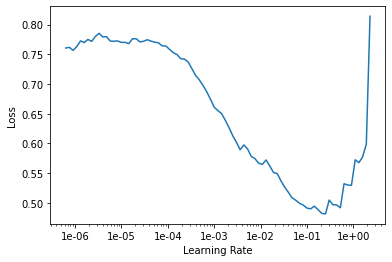

In [ ]:
learn.lr_find()
learn.recorder.plot(Suggestion=True)

In [ ]:
learn.fit_one_cycle(cyc_len=1, max_lr=min_grad_lr, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.272746,0.146719,0.932489,00:34


In [ ]:
learn.save('first')
# learn.load('first)


In [ ]:
learn.save('second')

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.290934,0.119366,0.947257,00:40


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.200885,0.104244,0.957806,00:44
1,0.192734,0.107556,0.949367,00:42
2,0.191630,0.106917,0.955696,00:43
3,0.173365,0.106154,0.951477,00:43
4,0.158581,0.093823,0.962025,00:43


In [ ]:
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [ ]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
# create a dataframe
df = pd.DataFrame({'label':dataset.target,
                   'text':dataset.data})

In [ ]:
df = df[df['label'].isin([1,10])]
df = df.reset_index(drop = True)

In [ ]:
df['label'].value_counts()

10    600
1     584
Name: label, dtype: int64

In [ ]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

In [ ]:
# tokenization 
tokenized_doc = df['text'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) 

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 
df['text'] = detokenized_doc


In [ ]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.4, random_state = 12)

In [ ]:
df_trn.shape, df_val.shape

((710, 2), (474, 2))

In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.7)

In [ ]:
# train the learner object
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.111175,5.200799,0.245297,00:10


In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


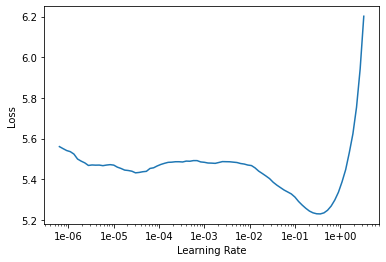

In [ ]:
learn.recorder.plot()

In [ ]:
learn.save_encoder('ft_enc')

In [ ]:
learn = text_classifier_learner(data_clas,AWD_LSTM, drop_mult=0.7)
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (710 items)
x: TextList
xxbos xxmaj it looks like xxmaj edmonton xxmaj oilers decided take xxmaj european xxunk spring xxmaj ranford xxmaj tugnutt xxmaj benning xxmaj manson xxmaj smith xxmaj buchberger xxmaj corson playing xxmaj canada xxmaj podein xxmaj weight playing xxup us xxmaj is xxmaj kravchuk playing xxmaj xxunk i know nagging injuries late season xxmaj podein interesting case eligible play xxmaj cape xxmaj breton xxup ahl playoffs like xxmaj kovalev xxmaj zubov xxmaj andersson obviously xxmaj sather xxmaj pocklington total xxunk everyone makes certainly case massively xxunk xxmaj paramount xxmaj new xxmaj york xxmaj rangers,xxbos xxmaj this xxunk xxmaj speaking die hard i i read xxunk hard xxunk xxmaj toronto xxmaj cup finals xxmaj first anyone planet heard team xxmaj detroit xxmaj al xxmaj xxunk however spell idiot name must xxmaj chicago xxup espn said even close xxmaj chicago xxunk win xxmaj norris xxmaj division xxmaj p

In [ ]:
learn.save('first')
# learn.load('first)